In [1]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [3]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#Split them into train & test
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

In [4]:
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


In [5]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [6]:
i = Input(shape=x_train[0].shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [7]:
# Note: make sure you are using the GPU for this.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 155s 3ms/sample - loss: 1.2923 - accuracy: 0.5591 - val_loss: 1.0728 - val_accuracy: 0.6293
Epoch 2/10
50000/50000 [==============================] - 161s 3ms/sample - loss: 0.8496 - accuracy: 0.7053 - val_loss: 1.0752 - val_accuracy: 0.6379
Epoch 3/10
50000/50000 [==============================] - 171s 3ms/sample - loss: 0.6954 - accuracy: 0.7601 - val_loss: 0.9120 - val_accuracy: 0.6994
Epoch 4/10
50000/50000 [==============================] - 172s 3ms/sample - loss: 0.5865 - accuracy: 0.7985 - val_loss: 0.7447 - val_accuracy: 0.7527
Epoch 5/10
50000/50000 [==============================] - 175s 4ms/sample - loss: 0.4975 - accuracy: 0.8297 - val_loss: 0.8978 - val_accuracy: 0.7176
Epoch 6/10
50000/50000 [==============================] - 177s 4ms/sample - loss: 0.4308 - accuracy: 0.8518 - val_loss: 0.8774 - val_accuracy: 0.7226
Epoch 7/10
50000/50000 [==========================

In [9]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit_generator(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=10)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 1562 steps, validate on 10000 samples
Epoch 1/10
1562/1562 [==============================] - 177s 113ms/step - loss: 0.6176 - accuracy: 0.7960 - val_loss: 0.6598 - val_accuracy: 0.7959
Epoch 2/10
1562/1562 [==============================] - 177s 114ms/step - loss: 0.5334 - accuracy: 0.8204 - val_loss: 0.5277 - val_accuracy: 0.8280
Epoch 3/10
1562/1562 [==============================] - 188s 120ms/step - loss: 0.4979 - accuracy: 0.8307 - val_loss: 0.5251 - val_accuracy: 0.8263
Epoch 4/10
1562/1562 [==============================] - 165s 106ms/step - loss: 0.4638 - accuracy: 0.8428 - val_loss: 0.5224 - val_accuracy: 0.8271
Epoch 5/10
1562/1562 [==============================] - 174s 111ms/step - loss: 0.4447 - accuracy: 0.8480 - val_loss: 0.4845 - val_accuracy: 0.8414
Epoch 6/10
1562/1562 [==============================] - 170s 109ms/step - loss: 0.4224 - accuracy: 0.8558 - val

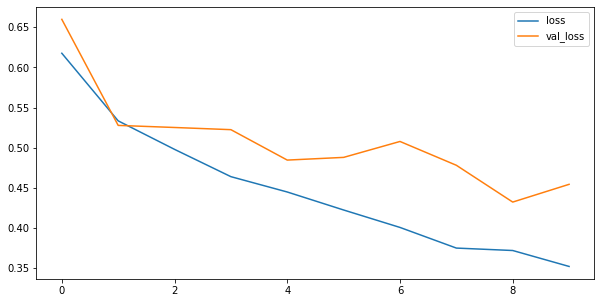

In [10]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,5]
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()


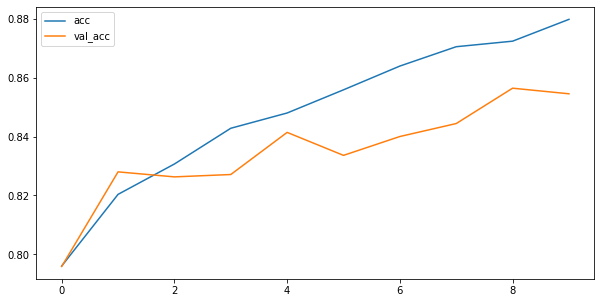

In [11]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[833  27  40  13   8   2  11   9  14  43]
 [  3 949   0   2   1   1   3   0   0  41]
 [ 28   2 782  37  33  46  44  21   1   6]
 [  7   7  29 686  37 126  66  29   0  13]
 [  4   2  18  21 863  25  37  29   0   1]
 [  4   2  16  88  30 809  23  23   1   4]
 [  3   4  16  19  12   6 936   3   0   1]
 [  5   2   8  22  15  18   3 919   0   8]
 [ 33  44  10   7   4   2   9   1 830  60]
 [  3  44   2   2   1   1   3   3   3 938]]


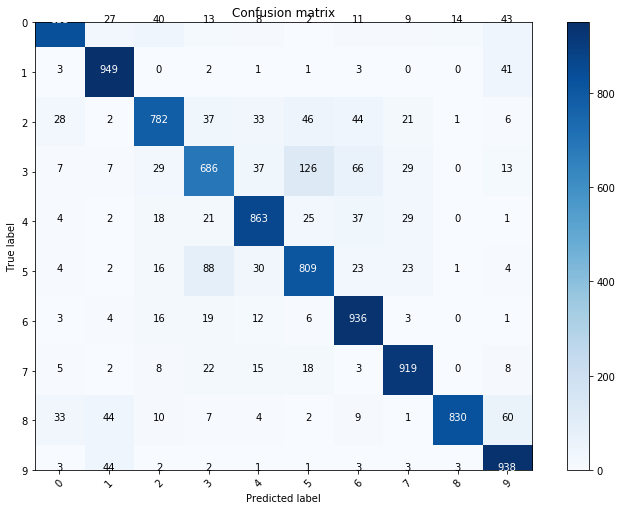

In [12]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools
plt.rcParams['figure.figsize'] = [10,7]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

from sklearn.metrics import confusion_matrix
import itertools
p_test = model.predict(testX).argmax(axis=1)
cm = confusion_matrix(testY, p_test)
plot_confusion_matrix(cm, list(range(10)))
